In [1]:
import pandas as pd
import networkx as nx
import itertools
import community as community_louvain
import json
from pyvis.network import Network
import pickle
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
data1_path = '/home/kic/data/dart_processed/dict_sector_product_processed.pickle'
data2_path = '/home/kic/data/dart_processed/html_EV_v2.pickle'
ev_list_path = '/home/kic/data/kodex/EV_processed.csv'

with open(data1_path, 'rb') as f:
    data1 = pickle.load(f)

with open(data2_path, 'rb') as f:
    data2 = pickle.load(f)

ev_list = pd.read_csv(ev_list_path, dtype=object)

In [3]:
# 기업명 추가 
# for key in data2.keys():
#     data2[key]['corp_name'] = ev_list.loc[ev_list.corp_code==key, 'corp_name'].values[0]

# with open('/home/kic/data/dart_processed/html_EV_v2.pickle', 'wb') as f:
#     pickle.dump(data2, f)

#### Entity - Dart 매칭
1. 사업의 개요
2. 주요 제품 및 서비스
3. 원재료 및 생산설비
4. 매출 및 수주상황
5. 위험관리 및 파생거래
6. 주요계약 및 연구개발활동 


* 주요 제품 (others), 관계사 (organization), 원재료 (material), 사업장 위치 (Location, city, country),관련 이슈 (theory), 산업군 (study_field)
* 제외: animal, civilization, event, occupation, person, plant, time, disease 

In [ ]:
# # Entity 종류 추출 
# test = set()
# for key, value in data2.items():
#     temp = {y[1] for x in value['ner'] for y in x}
#     test = test.union(temp)
# test

In [40]:
# map_dict = {
#     'ANIMAL': None,
#      'ARTIFACT': '주요제품',
#      'CITY': '사업장',
#      'CIVILIZATION': None,
#      'COUNTRY': '사업장',
#      'DISEASE': None,
#      'EVENT': None,
#      'LOCATION': '사업장',
#      'MATERIAL': '원재료',
#      'OCCUPATION': None,
#      'ORGANIZATION': '관계사',
#      'PERSON': None,
#      'PLANT': None,
#      'STUDY_FIELD': '산업군',
#      'TERM': '주요제품',
#      'THEORY': '관련이슈',
#      'TIME': None
# }

In [41]:
# for key, value in data2.items():
#     entities = set()
    
#     for ner in value['ner']:
#         ner_processed = {(x[0], map_dict[x[1]]) for x in ner}
#         entities = entities.union(ner_processed)
    
#     data2[key]['entities'] = entities

In [3]:
for key, value in data2.items():
    print(key)
    print(value['corp_name'])
    print(value['entities'])

00126362
삼성SDI
{('Volkswagen', '관계사'), ('EMC', '원재료'), ('2차', '주요제품'), ('QD', '주요제품'), ('중ㆍ대형전지', '주요제품'), ('테이진', '관계사'), ('스마트폰', '주요제품'), ('EMC', '관계사'), ('VW', '관계사'), ('TTI', '관계사'), ('Bayerische Motoren Werke', '관계사'), ('2차 전지', '주요제품'), ('디스플레이', '주요제품'), ('STELLANTIS', '관계사'), ('삼성전자', '관계사'), ('ESS', '주요제품'), ('OLED', '주요제품'), ('전기자동차', '주요제품'), ('BMW', '관계사'), ('천안', '사업장'), ('St', '관계사'), ('천진', '사업장'), ('Techtronic Cordless GP', '관계사'), ('상신EDP', '관계사'), ('CMP', '원재료'), ('에코프로', '관계사'), ('유미코아', '관계사'), ('리튬이온', '원재료'), ('EUV', '주요제품'), ('파워로직스', '관계사'), ('아사히', '관계사'), ('삼성디스플레이', '관계사'), ('양극활물질', '원재료'), ('전지', '주요제품'), ('SILICA', '원재료'), ('LCD', '주요제품'), ('넥스콘', '관계사'), ('소형전지', '주요제품'), ('반도체', '주요제품'), ('전력저장장치', '주요제품')}
00595191
후성
{('남구', '사업장'), ('D램', '주요제품'), ('K-4060', '주요제품'), ('한국', '사업장'), ('WF6', '주요제품'), ('우크라이나', '사업장'), ('중국', '사업장'), ('일본', '사업장'), ('C4F6', '원재료'), ('이차전지', '주요제품'), ('LiPF6', '주요제품'), ('전해질', '원재료'), ('C4F6', '주요제품'), ('2차전지', '주요제품'), 

In [45]:
# with open(data2_path, 'wb') as f:
#     pickle.dump(data2, f)

### 지식그래프 그려보기

In [4]:
g = nx.Graph()

#### 기업명으로 노드 만들기 

In [5]:
corp_name = []
for key in data2.keys():
    corp_name.append(data2[key]['corp_name'])
g.add_nodes_from(corp_name, kind='corporation')

{'삼성SDI': Text(-0.32599634112216164, -0.8910995646947122, '삼성SDI'),
 '후성': Text(0.9111658808906332, -0.3487814184713242, '후성'),
 '효성첨단소재': Text(0.26327256928713755, -0.9518197911369674, '효성첨단소재'),
 '화신': Text(-0.5366884855048274, 0.860033898028611, '화신'),
 '현대자동차': Text(-0.13915344525241471, -0.9465753997444574, '현대자동차'),
 '현대일렉트릭': Text(0.7678348539296471, -0.6399620259611035, '현대일렉트릭'),
 '현대위아': Text(-0.43493582986134727, -0.8916707763389342, '현대위아'),
 '현대오토에버': Text(-0.8528594713664955, 0.45470508199906734, '현대오토에버'),
 '현대에너지솔루션': Text(-0.24778902519584864, -0.9690163074556066, '현대에너지솔루션'),
 '현대모비스': Text(0.8893253083584725, -0.1072473795460892, '현대모비스'),
 '현대글로비스': Text(0.9049560287112041, 0.19502572108253138, '현대글로비스'),
 '해성디에스': Text(0.12703754355686256, -0.9547760615976266, '해성디에스'),
 '한화솔루션': Text(-0.047540397255339394, -0.8859705770258154, '한화솔루션'),
 '한솔케미칼': Text(0.9182393145543396, 0.40688024610646223, '한솔케미칼'),
 '한국타이어앤테크놀로지': Text(-0.4200956417955955, 0.8663591816900299, '

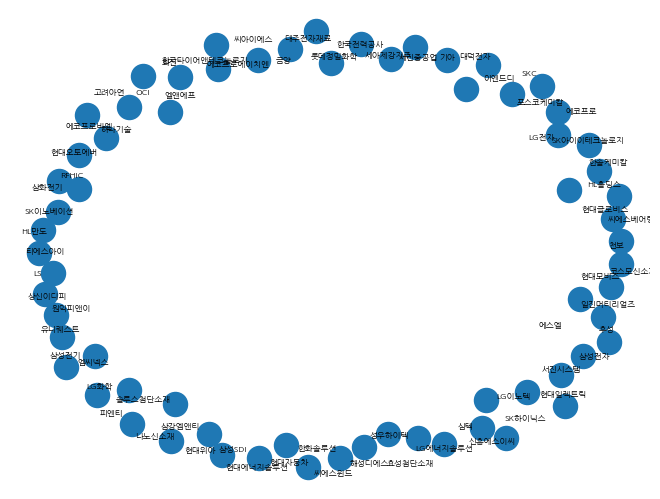

In [6]:
# 그려보기 
pos=nx.spring_layout(g)
nx.draw(g)
nx.draw_networkx_labels(g,pos, font_family='NanumGothic', font_size=6)

#### 기업 정보 추가 

찬송님 데이터

In [7]:
# 노드 생성 
주요제품_level1 = []
for key in data2.keys():
    주요제품_level1 += [product for product in data1[key]]
#     print([product for product in data1[key]])

In [8]:
주요제품_level1

['에너지솔루션',
 '전자재료',
 '기초화합물제조판매',
 '산업자재',
 '섬유',
 '자동차부품',
 '상품',
 '차량',
 '전기전자부문',
 '차량 부품',
 '기계',
 'ITO',
 'SI',
 '차량용 SW',
 '그린 에너지',
 '모듈 및 부품제조',
 'A/S용 부품',
 '반도체 Substrate',
 'LDPE',
 '가성소다',
 'PVC',
 '임대료',
 '자동차 부품',
 '산업용 소재',
 '전자소재',
 '태양광소재',
 '의류 잡화',
 '식음료',
 '임대 매출',
 '셀',
 '모듈',
 '자동차관련',
 '기타',
 '전기판매',
 '원자력발전',
 '화력발전',
 '이차전지 장비',
 '2차전지',
 '소재',
 '별도기준',
 '섬서인과기계설비',
 'People & Technology HUNGARY Kft.',
 '내화물',
 '라임화성',
 '에너지소재',
 '기능성필름',
 '토너',
 'NCM',
 'LCO',
 '전자소재',
 '이차전지소재',
 '의약품소재',
 '정밀화학소재',
 'Elecfoil',
 '촉매시스템',
 '촉매소재',
 'ADAS 솔루션',
 '부동산 임대 수입',
 '2차 전지 장비',
 '양극활물질외',
 '클린룸 케미컬 필터',
 '미세먼지 저감 솔루션',
 '온실가스 감축 솔루션',
 '양극재',
 '환경',
 '전지재료',
 '자동차 부품',
 '풍력타워제조',
 '풍력용',
 '산업용',
 'Tape Laminator',
 'Calender',
 'Slitter',
 'Coater',
 '인쇄 회로 기판',
 "중대형 각형 Cap Ass'y",
 '소형 원형 N-CID',
 '중대형 각형 CAN',
 '전지 Pack Module',
 "소형 원형 NS Ass'y",
 '동박',
 '전지박',
 'OLED',
 '바이오',
 '조선',
 '플랜트',
 '강관',
 '판재',
 '투자',
 '통신장비 부품',
 '휴대폰 부품',
 '반도체장비 부품',
 'ESS 부품',
 '2

In [9]:
g.add_nodes_from(주요제품_level1, kind='주요제품')

In [10]:
for key in data2.keys():
    주요제품_level1_temp = [product for product in data1[key]]
    회사명 = data2[key]['corp_name']
    edges = [(회사명, product) for product in 주요제품_level1_temp]
    g.add_edges_from(edges, kind='주요제품')

In [11]:
g['삼성SDI']

AtlasView({'에너지솔루션': {'kind': '주요제품'}, '전자재료': {'kind': '주요제품'}})

다트 데이터

In [16]:
# 노드 생성 및 추가 
for k, v in data2.items():
    for entity in v['entities']:
#         g.add_node(entity[0], kind=f'{entity[1]}')
    
        print(v['entities'])
        break

{('Volkswagen', '관계사'), ('EMC', '원재료'), ('2차', '주요제품'), ('QD', '주요제품'), ('중ㆍ대형전지', '주요제품'), ('테이진', '관계사'), ('스마트폰', '주요제품'), ('EMC', '관계사'), ('VW', '관계사'), ('TTI', '관계사'), ('Bayerische Motoren Werke', '관계사'), ('2차 전지', '주요제품'), ('디스플레이', '주요제품'), ('STELLANTIS', '관계사'), ('삼성전자', '관계사'), ('ESS', '주요제품'), ('OLED', '주요제품'), ('전기자동차', '주요제품'), ('BMW', '관계사'), ('천안', '사업장'), ('St', '관계사'), ('천진', '사업장'), ('Techtronic Cordless GP', '관계사'), ('상신EDP', '관계사'), ('CMP', '원재료'), ('에코프로', '관계사'), ('유미코아', '관계사'), ('리튬이온', '원재료'), ('EUV', '주요제품'), ('파워로직스', '관계사'), ('아사히', '관계사'), ('삼성디스플레이', '관계사'), ('양극활물질', '원재료'), ('전지', '주요제품'), ('SILICA', '원재료'), ('LCD', '주요제품'), ('넥스콘', '관계사'), ('소형전지', '주요제품'), ('반도체', '주요제품'), ('전력저장장치', '주요제품')}
{('남구', '사업장'), ('D램', '주요제품'), ('K-4060', '주요제품'), ('한국', '사업장'), ('WF6', '주요제품'), ('우크라이나', '사업장'), ('중국', '사업장'), ('일본', '사업장'), ('C4F6', '원재료'), ('이차전지', '주요제품'), ('LiPF6', '주요제품'), ('전해질', '원재료'), ('C4F6', '주요제품'), ('2차전지', '주요제품'), ('코로나19', None), ('러시아', '사

In [19]:
# 엣지 연결 
for k, v in data2.items():
    for entity in v['entities']:
        g.add_edge(v['corp_name'], entity[0], kind=f'{entity[1]}')

In [20]:
g['삼성SDI']

AtlasView({'에너지솔루션': {'kind': '주요제품'}, '전자재료': {'kind': '주요제품'}, 'Volkswagen': {'kind': '관계사'}, 'EMC': {'kind': '관계사'}, '2차': {'kind': '주요제품'}, 'QD': {'kind': '주요제품'}, '중ㆍ대형전지': {'kind': '주요제품'}, '테이진': {'kind': '관계사'}, '스마트폰': {'kind': '주요제품'}, 'VW': {'kind': '관계사'}, 'TTI': {'kind': '관계사'}, 'Bayerische Motoren Werke': {'kind': '관계사'}, '2차 전지': {'kind': '주요제품'}, '디스플레이': {'kind': '주요제품'}, 'STELLANTIS': {'kind': '관계사'}, '삼성전자': {'kind': '관계사'}, 'ESS': {'kind': '주요제품'}, 'OLED': {'kind': '주요제품'}, '전기자동차': {'kind': '주요제품'}, 'BMW': {'kind': '관계사'}, '천안': {'kind': '사업장'}, 'St': {'kind': '관계사'}, '천진': {'kind': '사업장'}, 'Techtronic Cordless GP': {'kind': '관계사'}, '상신EDP': {'kind': '관계사'}, 'CMP': {'kind': '원재료'}, '에코프로': {'kind': '관계사'}, '유미코아': {'kind': '관계사'}, '리튬이온': {'kind': '원재료'}, 'EUV': {'kind': '주요제품'}, '파워로직스': {'kind': '관계사'}, '아사히': {'kind': '관계사'}, '삼성디스플레이': {'kind': '관계사'}, '양극활물질': {'kind': '원재료'}, '전지': {'kind': '주요제품'}, 'SILICA': {'kind': '원재료'}, 'LCD': {'kind': '주요제품'}, '넥스콘': {

{'삼성SDI': Text(0.15929041802883148, 0.06376977264881134, '삼성SDI'),
 '후성': Text(0.2434583157300949, 0.15921440720558167, '후성'),
 '효성첨단소재': Text(0.4200443923473358, -0.25897416472435, '효성첨단소재'),
 '화신': Text(0.21836386620998383, -0.5750353336334229, '화신'),
 '현대자동차': Text(0.059302009642124176, -0.431112140417099, '현대자동차'),
 '현대일렉트릭': Text(-0.5718331933021545, -0.06084189563989639, '현대일렉트릭'),
 '현대위아': Text(0.5298571586608887, -0.1481752097606659, '현대위아'),
 '현대오토에버': Text(-0.16470575332641602, -0.7220461368560791, '현대오토에버'),
 '현대에너지솔루션': Text(-0.42676737904548645, -0.26982685923576355, '현대에너지솔루션'),
 '현대모비스': Text(0.06372950971126556, -0.26146993041038513, '현대모비스'),
 '현대글로비스': Text(-0.04448527842760086, 0.030427101999521255, '현대글로비스'),
 '해성디에스': Text(0.029454393312335014, 0.19996502995491028, '해성디에스'),
 '한화솔루션': Text(-0.39630407094955444, 0.3438614308834076, '한화솔루션'),
 '한솔케미칼': Text(-0.37378740310668945, 0.12734025716781616, '한솔케미칼'),
 '한국타이어앤테크놀로지': Text(0.21989943087100983, -0.1975939273834

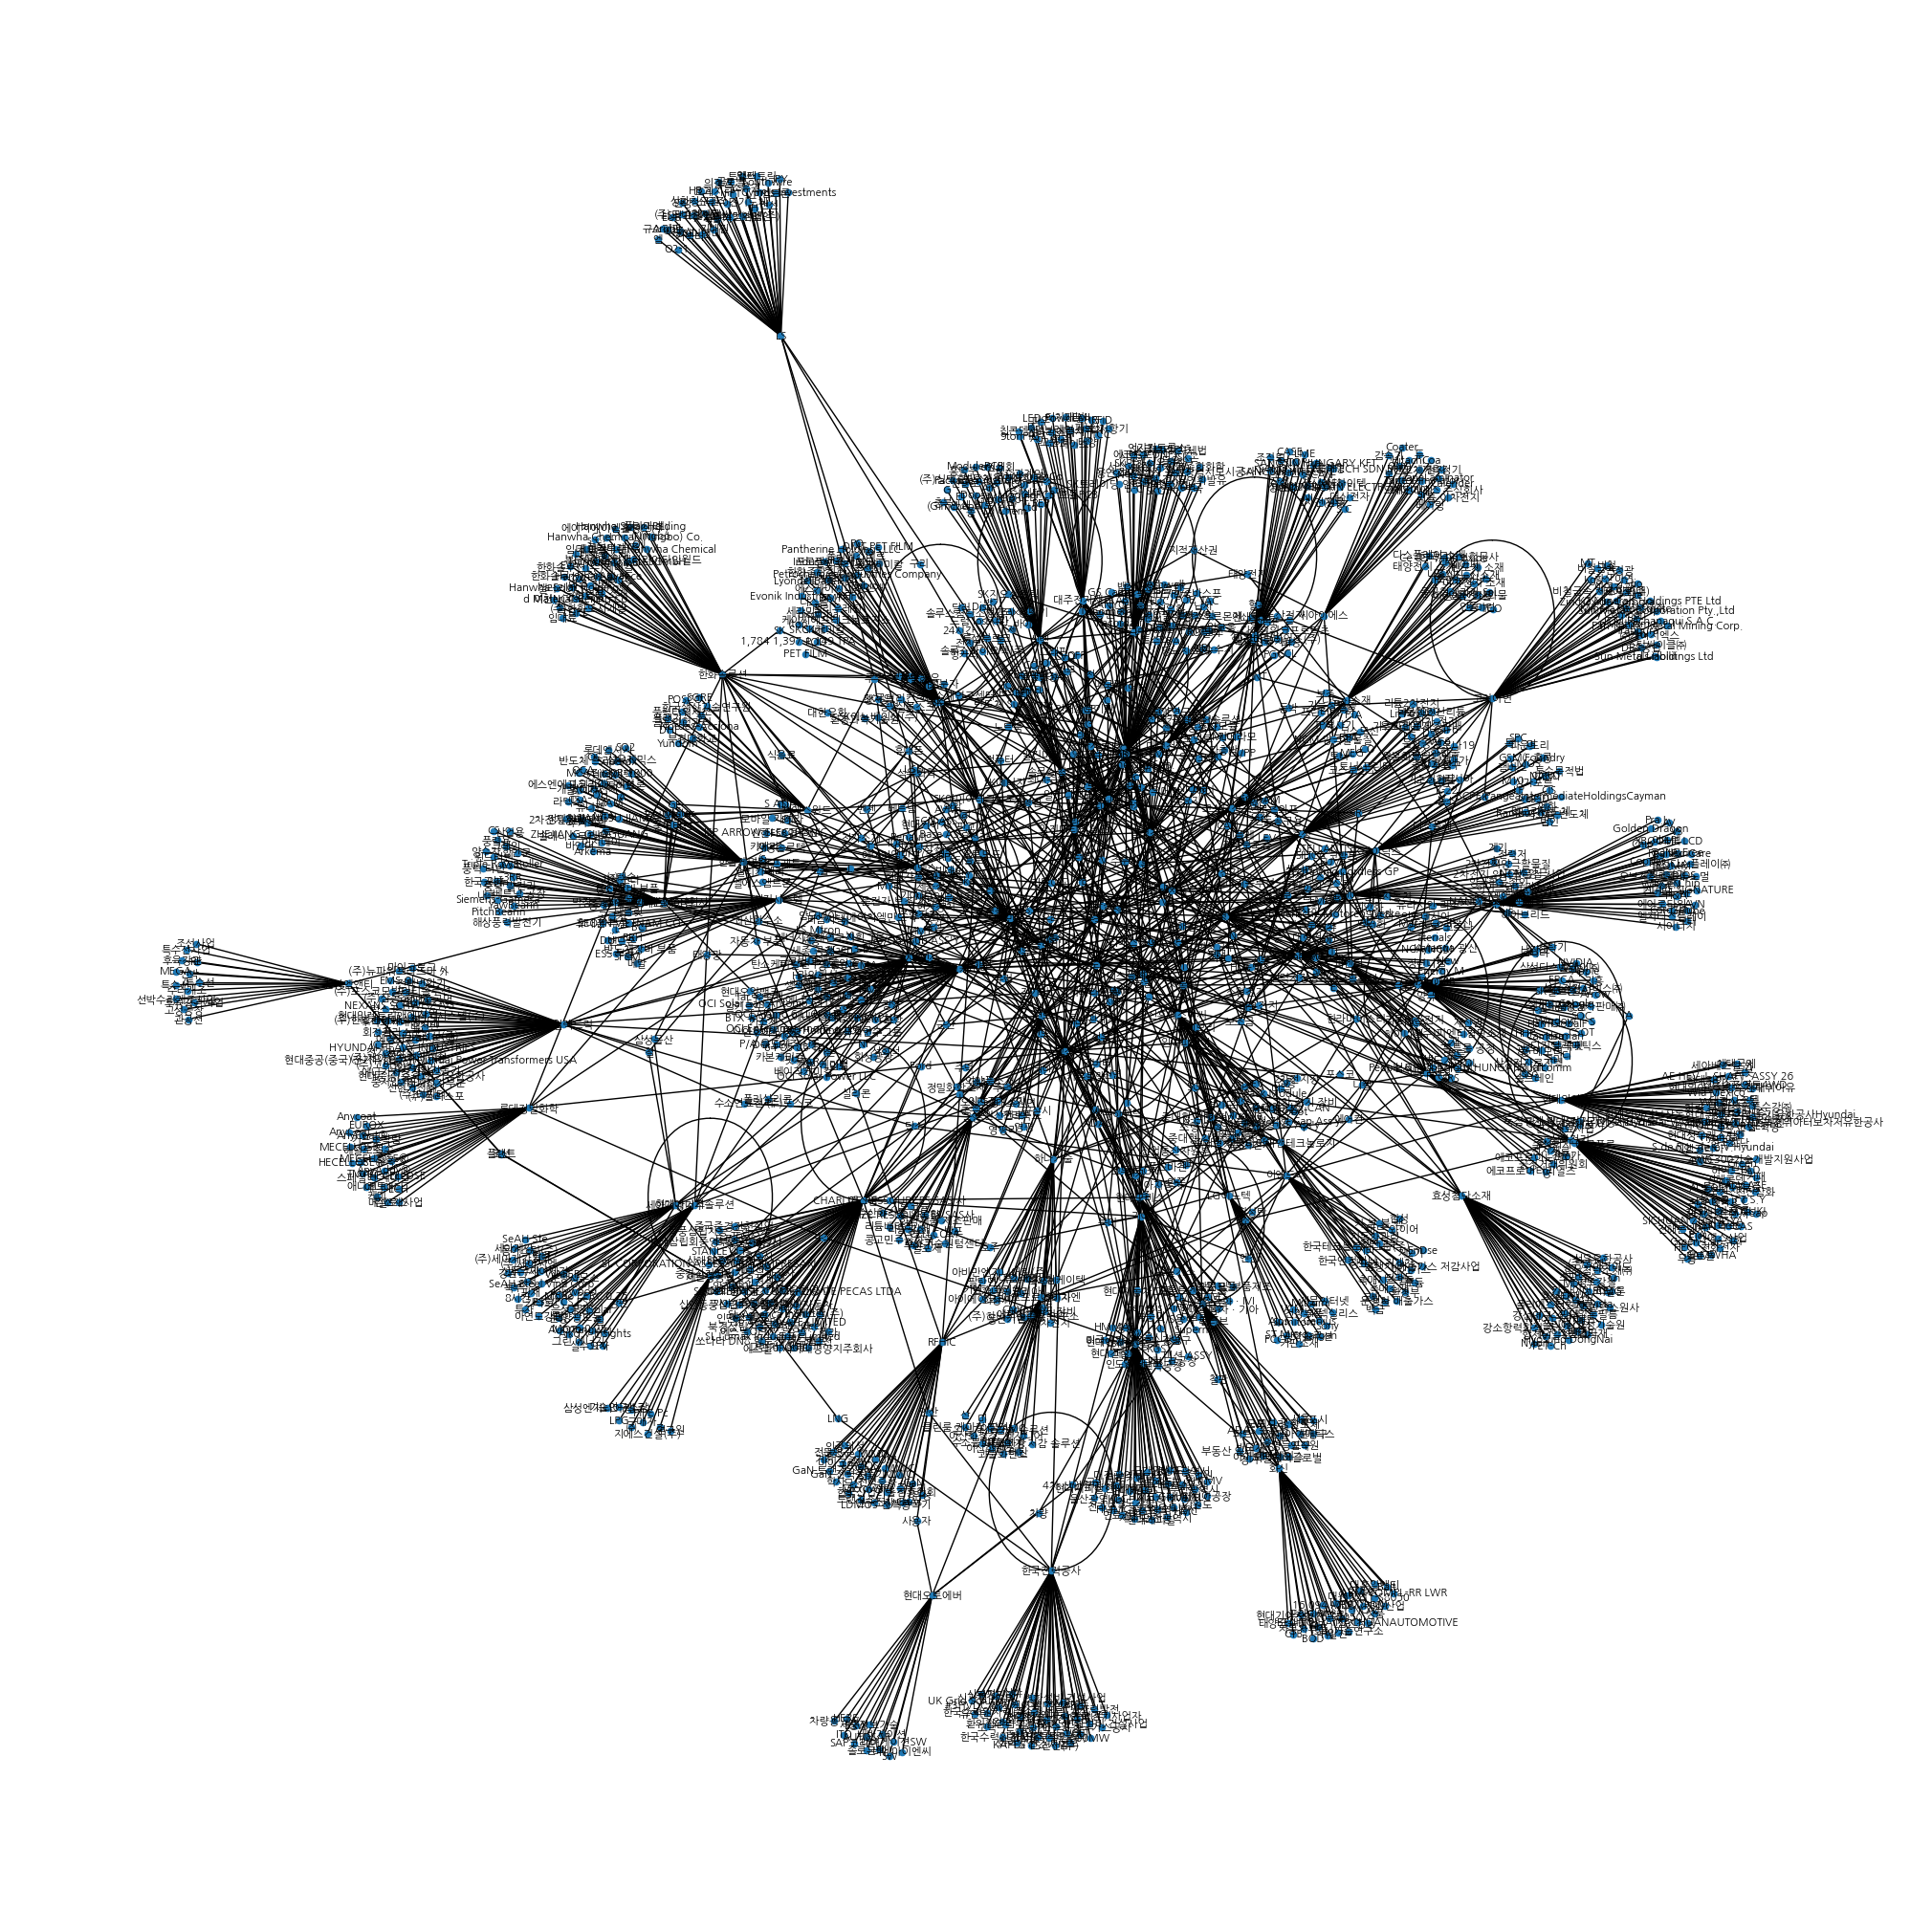

In [21]:
# 그려보기 
plt.figure(figsize=(20,20))
pos=nx.spring_layout(g)
nx.draw(g, pos, node_size=20)
nx.draw_networkx_labels(g,pos, font_family='NanumGothic', font_size=8)

#### 저장

In [22]:
nx.write_gml(g, path="graph_test")

In [4]:
import networkx as nx 
G_loaded = nx.read_gml(path='/home/kic/KPMG-ideathon/KG/dart_graph')

In [5]:
G_loaded['삼성SDI']

AtlasView({'에너지솔루션': {'kind': '주요제품1'}, '전자재료': {'kind': '주요제품1'}})

In [16]:
G_loaded['삼성SDI']['에너지솔루션']['kind']

'주요제품1'

In [23]:
from collections import deque

distance = 3 
keywords = {'주요제품1':[], '사업장':[], '관계사':[], '원재료':[], '관련이슈':[]}
stack = deque(['삼성SDI'])


for i in range(distance):
    while stack:
        node = stack.popleft()
        print(G_loaded[node])
        neighbors = list(G_loaded[node])
        for n in neighbors:
            keywords[G_loaded[node][n]['kind']].append(n)

    stack += neighbors 

print(keywords)
        
    


{'에너지솔루션': {'kind': '주요제품1'}, '전자재료': {'kind': '주요제품1'}}
{'삼성SDI': {'kind': '주요제품1'}, 'LG에너지솔루션': {'kind': '주요제품1'}}
{'삼성SDI': {'kind': '주요제품1'}, '대주전자재료': {'kind': '주요제품1'}, 'SKC': {'kind': '주요제품1'}}
{'에너지솔루션': {'kind': '주요제품1'}, '전자재료': {'kind': '주요제품1'}}
{'전자재료': {'kind': '주요제품1'}}
{'모빌리티 소재': {'kind': '주요제품1'}, 'Industry 소재': {'kind': '주요제품1'}, '화학': {'kind': '주요제품1'}, '전자재료': {'kind': '주요제품1'}, '기타': {'kind': '주요제품1'}}
{'주요제품1': ['에너지솔루션', '전자재료', '삼성SDI', 'LG에너지솔루션', '삼성SDI', '대주전자재료', 'SKC', '에너지솔루션', '전자재료', '전자재료', '모빌리티 소재', 'Industry 소재', '화학', '전자재료', '기타'], '사업장': [], '관계사': [], '원재료': [], '관련이슈': []}


In [ ]:
['주요제품1', '사업장', '관련이슈', '원재료', '관계사']

In [40]:
import pickle
import pandas as pd

with open('/home/kic/data/df_news_final.pickle', 'rb') as f:
    df = pickle.load(f)

with open('/home/kic/data/df_cos_sim.pickle', 'rb') as f:
    sim = pickle.load(f)


# article_df = df.drop_duplicates(subset='cluster', keep='last') 
df


,date,url,title,content,embedding,cluster1,cluster2,cluster3
0,2022.08.12.,https://www.hani.co.kr/arti/economy/car/105457...,유럽 ‘전기차 폐배터리 활용 의무화’ 카드…K배터리 발목 잡을까,"유럽연합, 폐배터리 원료 의무화 법안 준비 유럽업체 “2030년 너무 늦어, 5년 ...","[-0.31055453, -0.022188589, -0.52633923, 0.170...",2,2,1
1,2022.08.11.,http://news.mk.co.kr/newsRead.php?no=710591&ye...,폐배터리 테마 타고 코스모화학 `쑥`…올해 영업익 74% 증가 예상,2차전지(배터리) 소재 기업인 코스모화학이 폐배터리 재활용 생태계 활성화 및 이익 ...,"[-0.1470307, -0.21157177, -0.27517197, 0.12461...",0,9,14
2,2022.08.13.,http://news.mk.co.kr/newsRead.php?no=715528&ye...,[재계프리즘] 배터리 순환경제를 키워라,"사진 확대 최근 기획재정부 장기전략국 탄소중립전략팀 주재로 산업통상자원부, 국토교통...","[-0.33976254, -0.06986121, -0.5093528, 0.08632...",5,11,0
3,2022.08.08.,https://www.mk.co.kr/economy/view/2022/690553,대기업 뛰어들고 IPO 흥행…‘폐배터리’ 주목,전기차 시장이 가파르게 성장하면서 수명을 다한 폐배터리를 재사용·재활용하는 사업도 ...,"[-0.21352631, -0.14591789, -0.25971246, 0.0912...",2,9,14
4,2022.08.08.,https://www.ekn.kr/web/view.php?key=2022080801...,"산업계, 폐배터리 재활용 박차...탄소중립·원가절감 '두토끼' 잡는다",▲SK이노베이션 연구원이 폐배터리에서 추출한 재활용 수산화리튬을 소개하고 있다. [...,"[-0.30919856, -0.08021941, -0.38577503, 0.0885...",2,4,13
...,...,...,...,...,...,...,...,...
288,2022.12.21.,https://www.khan.co.kr/economy/industry-trade/...,"LG화학, 폐배터리 재활용기업 재영텍에 240억 투자···북미 진출 포석",LG화학은 폐배터리 재활용 전문업체 재영텍과 240억원 규모의 지분투자 계약을 맺었...,"[-0.23441757, -0.15048164, -0.4170487, 0.02209...",8,3,9
289,2022.12.21.,https://www.dailian.co.kr/news/view/1185353/?s...,"LG화학, 재영텍과 북미 폐배터리 재활용 시장 진출","(왼쪽부터) LG화학이지웅M&A담당상무, LG화학이상협경영전략담당상무,재영텍박재호대...","[-0.2328249, -0.1634574, -0.34575462, 0.056736...",8,3,9
290,2022.12.21.,https://www.sedaily.com/NewsView/26EZLKFG3C,"""북미 폐배터리 재활용""…LG화학, 재영텍과 맞손",viewer 21일 서울 여의도 LG트윈타워에서 이상협(왼쪽 두 번째) LG화학 경...,"[-0.21492471, -0.17537229, -0.44639423, 0.0757...",8,3,9
291,2022.12.21.,http://www.dt.co.kr/contents.html?article_no=2...,"폐배터리 재활용에 240억 …LG화학·재영텍, 투자계약","이지웅(왼쪽부터) LG화학 M&A담당 상무, 이상협 LG화학 경영전략담당 상무, ...","[-0.22047457, -0.14739957, -0.4003315, 0.06785...",8,3,9


In [15]:
import os
from tqdm import tqdm
import pickle
from itertools import chain
import json
import sys
import numpy as np
sys.path.append('/home/kic/KPMG-ideathon/IE/news')
from models import MyFastPororo
from pororo import Pororo
# PATH_ROOT = '/home/cslim/KPMG/data/news'



In [18]:
ner = MyFastPororo()
ner.load_model()

In [21]:
token_ids

tensor([  0, 152, 688,  ..., 285,  65,   2])

In [27]:
df.loc[0, 'cluster1']

2

In [42]:
df['ner'] = [[] for i in range(len(df))]

In [46]:
df['ner'][0] = [1, 2, 3]

/tmp/ipykernel_3272162/2307083913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ner'][0] = [1, 2, 3]


In [47]:
df['ner'][0]

[1, 2, 3]

In [25]:
from models import MyFastPororo

# prepare model
ner = MyFastPororo()
ner.load_model()

# inference
text = '삼정 KPMG에서 주최하는 아이디어톤에 서울대 데이터사이언스대학원 (GSDS) 의 박건도, 서아름, 손성욱, 임찬송, 최유림, 허상우 학생이 참여하였습니다.'

tokenized_sent, token_ids = ner.tokenizer(text)
preds = ner.inference(token_ids)[0]
result = ner.post_process(tokenized_sent, preds)
print(result)

AttributeError: module 'fairseq.utils' has no attribute 'item'

In [23]:
text = df.content[0][:500]
tokenized_sent, token_ids = ner.tokenizer(text)
preds = ner.inference(token_ids)[0]
result = ner.post_process(tokenized_sent, preds)

AttributeError: module 'fairseq.utils' has no attribute 'item'

In [10]:
ner.post_process(df.content[0], 1)

TypeError: 'int' object is not iterable